In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
Humidity= pd.read_csv("humidity",parse_dates=True,index_col="Date")

In [3]:
#set option to display entire dataframe rows 
pd.set_option('display.max_rows', None)
Humidity

,Humidité de la terre (V%)
Date,
2021-10-20 22:57:08,41.4
2021-10-20 18:51:54,41.5
2021-10-20 10:41:24,41.7
2021-10-20 06:36:10,41.8
2021-10-19 21:27:16,42.1
2021-10-19 17:25:02,42.8
2021-10-19 16:35:06,42.8
2021-10-19 12:32:52,42.8
2021-10-18 16:44:40,41.3


In [4]:
#change the name of the series
Humidity=Humidity.rename(columns={'Humidité de la terre (V%)': 'Humidity (V%)'})

In [5]:
Humidity[Humidity['Humidity (V%)']==40]

,Humidity (V%)
Date,
2021-09-12 21:08:30,40.0
2021-08-12 04:08:03,40.0
2021-08-08 23:33:00,40.0
2021-08-04 22:18:53,40.0
2021-08-01 15:23:11,40.0
2021-07-28 17:05:17,40.0
2021-07-24 11:54:43,40.0


In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
#instantiate the MinMaxScaler class with a range of 0 to 1
Scaler = MinMaxScaler([0,1])

In [56]:
#create training and validation dataset 
split=300
humidity_train = Humidity.iloc[:split].values
train_time =Humidity.index.values[:split]
humidity_validation = Humidity.iloc[split+1:].values
tvalidation_time =Humidity.index.values[split+1:]
#Scale the data into a 0-1 range
humidity_train_scaled = Scaler.fit_transform(humidity_train.reshape(-1, 1))
humidity_validation_scaled= Scaler.transform(humidity_validation.reshape(-1, 1))

In [57]:
humidity_train_scaled[:10]

array([[0.71014493],
       [0.7173913 ],
       [0.73188406],
       [0.73913043],
       [0.76086957],
       [0.8115942 ],
       [0.8115942 ],
       [0.8115942 ],
       [0.70289855],
       [0.71014493]])

In [10]:
window_size = 3
batch_size = 32
shuffle_buffer_size = 1000

In [11]:
# Inputs: data series, size of the window,The size of the batches to use when training,
# the size of the shuffle buffer, which determines how the data will be shuffled.

# Expand the dimensions of the series to work with the LSTM's
# Create dataset from the series
# Slice the data up into the appropriate windows, shifted by one time set.
# keep them all the same size by setting drop remainder to true.

# Return the dataset that batched into the selected batch size 
def windowed_dataset(pd_series, window_size, batch_size, shuffle_buffer):
    # add one dimension to the array 
    pd_series = tf.expand_dims(pd_series, axis=-1)
    #creates a tensor from each element
    data = tf.data.Dataset.from_tensor_slices(pd_series)
    #window the data into chunks of  4 items by shifting by 1 each time
    data= data.window(window_size+1,shift=1,drop_remainder=True)
    # flatten the data into chunks in the size of our window_size + 1.
    data = data.flat_map(lambda w: w.batch(window_size + 1))
    # Shuffle it with shuffle buffer that speeds things up with large datasets
    data = data.shuffle(shuffle_buffer_size)
    
    data = data.map(lambda w: (w[:-1], w[1:]))
    return data.batch(batch_size).prefetch(1)

In [12]:
# We can use this function to make some prediction by using the trained model 

def  model_forecast(model, pd_series, window_size):
    data = tf.data.Dataset.from_tensor_slices(pd_series)
    data = data.window(window_size, shift=1, drop_remainder=True)
    data = data.flat_map(lambda w: w.batch(window_size))
    data = data.batch(32).prefetch(1)
    forecast = model.predict(data)
    return forecast

In [16]:
# Let's define random_seeds and the variables
# Clear keras session 
tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

shuffle_buffer_size = 1000
#we will predict humidity levels for 6 values  : the output is the 7th
window_size = 7
batch_size = 128

# Use windowed_dataset function to make dataset suitable
train_set = windowed_dataset(humidity_train_scaled, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(humidity_train_scaled.shape)

<PrefetchDataset shapes: ((None, None), (None, None)), types: (tf.float64, tf.float64)>
(300, 1)


In [27]:
#We use "lr_schedule" to see which "learning rate" is optimum 
# Run the model with less epoch to visualize "learning rate" vs "loss"
learning_rate_schedule = tf.keras.callbacks.LearningRateScheduler(
                    lambda epoch: 1e-8 * 10**(epoch/20))
# Optimizer and loos parameters
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)
loss = tf.keras.losses.Huber()

Epoch 1/100
3/3 [==============================] - 4s 34ms/step - loss: 16.1268 - mae: 16.6249 - lr: 1.0000e-08
Epoch 2/100
3/3 [==============================] - 0s 20ms/step - loss: 16.0855 - mae: 16.5836 - lr: 1.1220e-08
Epoch 3/100
3/3 [==============================] - 0s 20ms/step - loss: 16.0075 - mae: 16.5056 - lr: 1.2589e-08
Epoch 4/100
3/3 [==============================] - 0s 20ms/step - loss: 15.8970 - mae: 16.3951 - lr: 1.4125e-08
Epoch 5/100
3/3 [==============================] - 0s 15ms/step - loss: 15.7556 - mae: 16.2538 - lr: 1.5849e-08
Epoch 6/100
3/3 [==============================] - 0s 15ms/step - loss: 15.5839 - mae: 16.0822 - lr: 1.7783e-08
Epoch 7/100
3/3 [==============================] - 0s 15ms/step - loss: 15.3807 - mae: 15.8791 - lr: 1.9953e-08
Epoch 8/100
3/3 [==============================] - 0s 15ms/step - loss: 15.1449 - mae: 15.6434 - lr: 2.2387e-08
Epoch 9/100
3/3 [==============================] - 0s 15ms/step - loss: 14.8724 - mae: 15.3704 - lr: 2.5

(1e-08, 0.001, 0.0, 80.0)

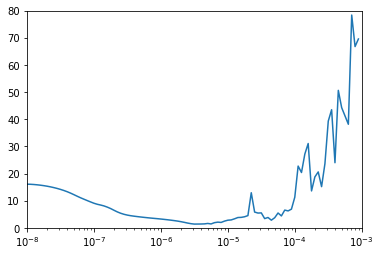

In [22]:
# Build and Fit the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=7, kernel_size=5,
                          strides=1, padding='causal',
                          activation='relu',
                          input_shape=[None, 1]),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Lambda(lambda x: x * 400)
])
model.compile(loss=loss, optimizer=optimizer, metrics=['mae'])

history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

# Let's visualize "learning rate" vs "loss"
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-3, 0, 80])

In [25]:
# Let's rerun the model with the optimul learning rate
tf.keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

shuffle_buffer_size = 1000
window_size = 7
batch_size = 64

train_set = windowed_dataset(humidity_train_scaled, window_size, batch_size, shuffle_buffer_size)

optimizer = tf.keras.optimizers.SGD(lr=7e-6, momentum=0.9)
loss = tf.keras.losses.Huber()

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                          strides=1, padding='causal',
                          activation='relu',
                          input_shape=[None, 1]),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Lambda(lambda x: x * 400)
])

model.compile(loss=loss, optimizer=optimizer, metrics=['mae'])

history = model.fit(train_set, epochs=200)


Epoch 1/200
6/6 [==============================] - 4s 17ms/step - loss: 52.6214 - mae: 53.1203
Epoch 2/200
6/6 [==============================] - 0s 11ms/step - loss: 18.3452 - mae: 18.8447
Epoch 3/200
6/6 [==============================] - 0s 10ms/step - loss: 9.7700 - mae: 10.2646
Epoch 4/200
6/6 [==============================] - ETA: 0s - loss: 3.5512 - mae: 4.031 - 0s 10ms/step - loss: 5.5339 - mae: 6.0210
Epoch 5/200
6/6 [==============================] - 0s 10ms/step - loss: 4.3902 - mae: 4.8761
Epoch 6/200
6/6 [==============================] - 0s 10ms/step - loss: 2.8790 - mae: 3.3497
Epoch 7/200
6/6 [==============================] - 0s 10ms/step - loss: 2.0443 - mae: 2.5023
Epoch 8/200
6/6 [==============================] - 0s 9ms/step - loss: 1.7153 - mae: 2.1672
Epoch 9/200
6/6 [==============================] - 0s 10ms/step - loss: 1.8142 - mae: 2.2649
Epoch 10/200
6/6 [==============================] - 0s 10ms/step - loss: 1.7146 - mae: 2.1697
Epoch 11/200
6/6 [=========

6/6 [==============================] - 0s 8ms/step - loss: 1.2686 - mae: 1.6919
Epoch 89/200
6/6 [==============================] - 0s 7ms/step - loss: 1.2840 - mae: 1.7099
Epoch 90/200
6/6 [==============================] - 0s 7ms/step - loss: 1.2926 - mae: 1.7161
Epoch 91/200
6/6 [==============================] - 0s 10ms/step - loss: 1.2493 - mae: 1.6672
Epoch 92/200
6/6 [==============================] - 0s 11ms/step - loss: 1.2482 - mae: 1.6661
Epoch 93/200
6/6 [==============================] - 0s 12ms/step - loss: 1.3021 - mae: 1.7280
Epoch 94/200
6/6 [==============================] - 0s 11ms/step - loss: 1.2879 - mae: 1.7128
Epoch 95/200
6/6 [==============================] - 0s 11ms/step - loss: 1.2782 - mae: 1.6986
Epoch 96/200
6/6 [==============================] - 0s 11ms/step - loss: 1.3144 - mae: 1.7494
Epoch 97/200
6/6 [==============================] - 0s 9ms/step - loss: 1.2898 - mae: 1.7094
Epoch 98/200
6/6 [==============================] - 0s 8ms/step - loss: 1.240

6/6 [==============================] - 0s 11ms/step - loss: 1.1969 - mae: 1.6059
Epoch 176/200
6/6 [==============================] - 0s 12ms/step - loss: 1.3376 - mae: 1.7798
Epoch 177/200
6/6 [==============================] - 0s 10ms/step - loss: 1.2554 - mae: 1.6812
Epoch 178/200
6/6 [==============================] - 0s 8ms/step - loss: 1.1970 - mae: 1.6079
Epoch 179/200
6/6 [==============================] - 0s 10ms/step - loss: 1.1891 - mae: 1.5976
Epoch 180/200
6/6 [==============================] - 0s 10ms/step - loss: 1.1997 - mae: 1.6128
Epoch 181/200
6/6 [==============================] - 0s 8ms/step - loss: 1.1761 - mae: 1.5790
Epoch 182/200
6/6 [==============================] - 0s 8ms/step - loss: 1.1679 - mae: 1.5708
Epoch 183/200
6/6 [==============================] - 0s 8ms/step - loss: 1.1727 - mae: 1.5809
Epoch 184/200
6/6 [==============================] - 0s 8ms/step - loss: 1.2336 - mae: 1.6576
Epoch 185/200
6/6 [==============================] - 0s 8ms/step - lo

In [65]:
humidity_train_scaled

array([[0.71014493],
       [0.7173913 ],
       [0.73188406],
       [0.73913043],
       [0.76086957],
       [0.8115942 ],
       [0.8115942 ],
       [0.8115942 ],
       [0.70289855],
       [0.71014493],
       [0.71014493],
       [0.72463768],
       [0.73188406],
       [0.73188406],
       [0.74637681],
       [0.76811594],
       [0.80434783],
       [0.8115942 ],
       [0.82608696],
       [0.73188406],
       [0.73188406],
       [0.73188406],
       [0.77536232],
       [0.84057971],
       [0.83333333],
       [0.6884058 ],
       [0.6884058 ],
       [0.6884058 ],
       [0.70289855],
       [0.71014493],
       [0.73913043],
       [0.75362319],
       [0.8115942 ],
       [0.77536232],
       [0.67391304],
       [0.68115942],
       [0.69565217],
       [0.71014493],
       [0.76811594],
       [0.84057971],
       [0.8115942 ],
       [0.84782609],
       [0.64492754],
       [0.65217391],
       [0.67391304],
       [0.70289855],
       [0.7173913 ],
       [0.739

In [69]:
rnn_forecast = model_forecast(model, humidity_train_scaled, window_size)

In [70]:
time_train = Humidity.index.values[:split]
time_valid= Humidity.index.values[split+1:]

In [71]:
time_train

array(['2021-10-20T22:57:08.000000000', '2021-10-20T18:51:54.000000000',
       '2021-10-20T10:41:24.000000000', '2021-10-20T06:36:10.000000000',
       '2021-10-19T21:27:16.000000000', '2021-10-19T17:25:02.000000000',
       '2021-10-19T16:35:06.000000000', '2021-10-19T12:32:52.000000000',
       '2021-10-18T16:44:40.000000000', '2021-10-18T12:42:27.000000000',
       '2021-10-18T12:12:54.000000000', '2021-10-18T10:28:57.000000000',
       '2021-10-18T05:16:42.000000000', '2021-10-18T05:15:10.000000000',
       '2021-10-17T23:30:36.000000000', '2021-10-17T18:33:21.000000000',
       '2021-10-17T14:31:05.000000000', '2021-10-17T13:44:32.000000000',
       '2021-10-17T09:40:29.000000000', '2021-10-17T05:13:39.000000000',
       '2021-10-17T05:12:06.000000000', '2021-10-17T05:10:32.000000000',
       '2021-10-16T20:10:57.000000000', '2021-10-16T16:08:43.000000000',
       '2021-10-16T12:28:18.000000000', '2021-10-16T08:23:51.000000000',
       '2021-10-15T22:33:58.000000000', '2021-10-15

ValueError: x and y must have same first dimension, but have shapes (61,) and (294, 7, 1)

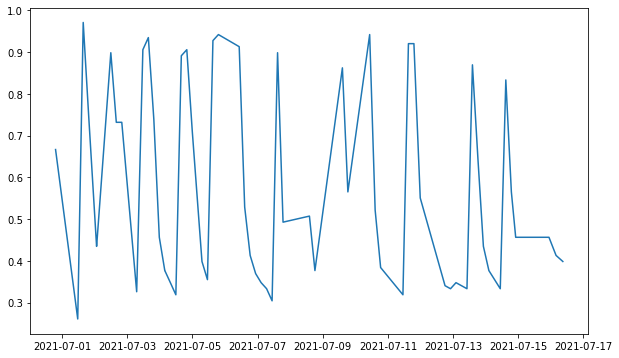

In [74]:
plt.figure(figsize=(10, 6))
plt.plot(time_valid, humidity_validation_scaled)
plt.plot(time_valid, rnn_forecast)